In [1]:
### Lectures des donnees et fonctions
library(Matrix)
u.user <- read.csv(file='u.user.csv', sep='|', header=T)
u.item <- read.csv(file='u.item.csv', sep='|', header=T)
u.data <- read.csv(file='u.data.csv', sep='|', header=T)

m.sparse <- sparseMatrix(u.data[,1],u.data[,2],x=u.data[,3])
rownames(m.sparse) <- paste('u', 1:nrow(m.sparse), sep='')
colnames(m.sparse) <- paste('i', 1:ncol(m.sparse), sep='')

m <- as.matrix(m.sparse)                # transforme en matrice ordinaire
m.na <- m
m.na[m.na==0] <- NA

# Cosinus normal des lignes d'une matrice
matrix.cos <- function(m) {
     (m %*% t(m)) / ( t(matrix(sqrt(rowSums(m^2)),nrow(m),nrow(m)))
                    * (sqrt(rowSums(m^2))) )
}
# on normalise les ages
u.user.norm <- u.user
u.user.norm$age = (u.user.norm$age - min(u.user.norm$age)) / (max(u.user.norm$age) - min(u.user.norm$age))

# on normalise les votes
u.data.norm <- u.data
u.data.norm$rating = (u.data.norm$rating - min(u.data.norm$rating)) / (max(u.data.norm$rating) - min(u.data.norm$rating))

m.na.norm <- m.na/5
m.norm <- m/5

mae <- function(m1, m2) mean(abs(m1 - m2), na.rm=T)

In [2]:
# merge users and ratings
names(u.user)<- c('user.id','age','gender','job')
u.user <- u.user[,c(-5)]

names(u.data)<- c('user.id','movie.id','rating')
u.data <- u.data[,c(-4)]

u.item <- u.item[,c(-2,-3,-4,-5)]

u.r <- merge(u.user, u.data, by = "user.id")
# merge userRating with movie to have actual movie titles instead of ids
u.r.v <- merge(u.r, u.item, by = "movie.id")
head(u.r.v)


movie.id,user.id,age,gender,job,rating,unknown,Action,Adventure,Animation,...,Fantasy,Film.Noir,Horror,Musical,Mystery,Romance,Sci.Fi,Thriller,War,Western
1,918,40,M,scientist,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,684,28,M,student,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,660,26,M,student,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,339,35,M,lawyer,5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,699,44,M,other,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,94,26,M,student,4,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [4]:
# creation de la formule
formula <- as.factor(rating) ~ .


In [5]:
i.observed <- dim(u.r.v)[1]
set.seed(1)
i.hasard <- sample(seq(1,i.observed,1), i.observed)
fold.size <- round(length(i.hasard) / 5)
i.false <- rep(FALSE, dim(u.r.v)[1])
total <- c()
for (j in 1:20)
{
    temp <- c()
    for (i in 1:5){
        fold.number <- i

        ## Index booléen pour les cellules de test et d'entraînement
        i.test.b <- i.false
        ## Les cellules indexées du replis correspondant sont fixées à TRUE pour le test...
        i.test.b[ i.hasard[((fold.number-1) * fold.size):((fold.number) * fold.size)] ] <- TRUE


        ## ...et à FALSE pour l'entraînement
        i.train.b <-  !i.test.b
        u.r.v.train <- u.r.v[i.train.b,]
        u.r.v.test <- u.r.v[i.test.b,]
        # entrainement de l'arbre
        rf <- randomForest(formula, data = u.r.v.train, ntree = j)
        pred <- predict(rf, u.r.v.test)
        temp <- c(temp,mae(as.numeric(pred),u.r.v.test$rating))
        }
total <- c(total, mean(temp))
}

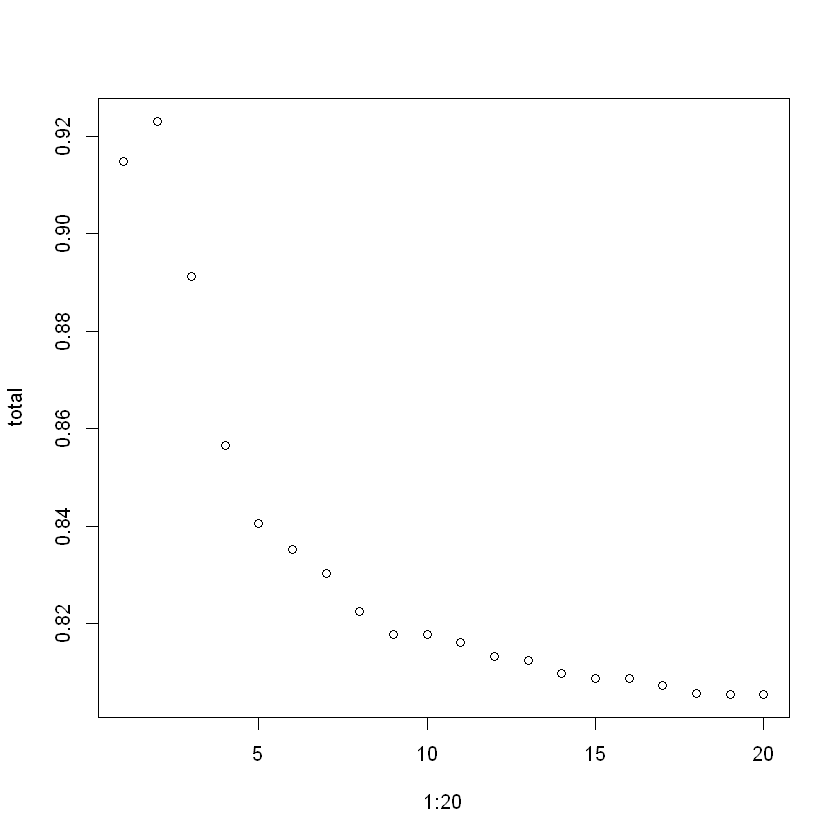

In [6]:
# on retrouve la meilleur des possibilites
plot(1:20,total)

chargement des données calculées précedemmentà

In [ ]:
table = list()
test = list()

In [ ]:
table[[1]] <- read.table(file=paste("rF1_1.csv", sep = "")) # drops the rownames
table[[2]] <- read.table(file=paste("rF1_2.csv", sep = "")) # drops the rownames
table[[3]] <- read.table(file=paste("rF1_3.csv", sep = "")) # drops the rownames
table[[4]] <- read.table(file=paste("rF1_4.csv", sep = "")) # drops the rownames
table[[5]] <- read.table(file=paste("rF1_5.csv", sep = "")) # drops the rownames

test[[1]] <- read.table(file=paste("rFTestc1_1.csv", sep = "")) # drops the rownames
test[[2]] <- read.table(file=paste("rFTestc1_2.csv", sep = "")) # drops the rownames
test[[3]] <- read.table(file=paste("rFTestc1_3.csv", sep = "")) # drops the rownames
test[[4]] <- read.table(file=paste("rFTestc1_4.csv", sep = "")) # drops the rownames
test[[5]] <- read.table(file=paste("rFTestc1_5.csv", sep = "")) # drops the rownames



calcul du MAE et du MAE par dimensions


In [ ]:
cv.b <- c()
to.plot <- c()
for (i in 1:5){
m.train <- data.matrix(table[[i]])
i.test.c <- unlist(test[[i]])
m.svd <- svd(m.train)
to.plot<-rbind(to.plot,unlist(lapply(seq(22), new.m.cv)))
cv.b <- c(cv.b, mae(m.train[i.test.c],m.na[i.test.c]))
    }

In [ ]:
to.plot<-apply(to.plot,2,unlist)

In [ ]:
sdev <- apply(to.plot,2,sd) 
avg <- colMeans(to.plot)
x <- 1:length(avg)

In [ ]:
plot(x,colMeans(to.plot),ylim=range(c(avg-sdev, avg+sdev)),pch=19, xlab="Dimensions", ylab="MAE +/- SD",
    main="Random Forest"
)
# hack: we draw arrows but with very special "arrowheads"
arrows(x, avg-sdev, x, avg+sdev, length=0.05, angle=90, code=3)

Moyenne du MAE par dimension pour les 5fold

In [ ]:
avg

Moyenne du MAE pour les 5fold

In [ ]:
mean(cv.b)

On ecrit la valeur dans un fichier pour utilisation future

In [ ]:
write.table(avg, file="out/total/RF.csv")